In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import rand_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import validation_curve, learning_curve, train_test_split,GridSearchCV, RandomizedSearchCV

from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')



In [2]:
email_data = pd.read_csv("./spambase.csv")
# exclude id column
email_input = email_data.iloc[:, 1:-1]
email_target = email_data.iloc[:, -1]
mobile_data = pd.read_csv("./mobile_price.csv")
mobile_data.describe()
mobile_input = mobile_data.iloc[:, :-1]
mobile_target = mobile_data.iloc[:, -1]
ss = MinMaxScaler()
email_scaled_input = ss.fit_transform(email_input)
mobile_scaled_input = ss.fit_transform(mobile_input)
# rus = RandomUnderSampler(random_state=42, replacement=False)
# input_rus, target_rus = rus.fit_resample(input, target)

Text(0, 0.5, 'Corrleation')

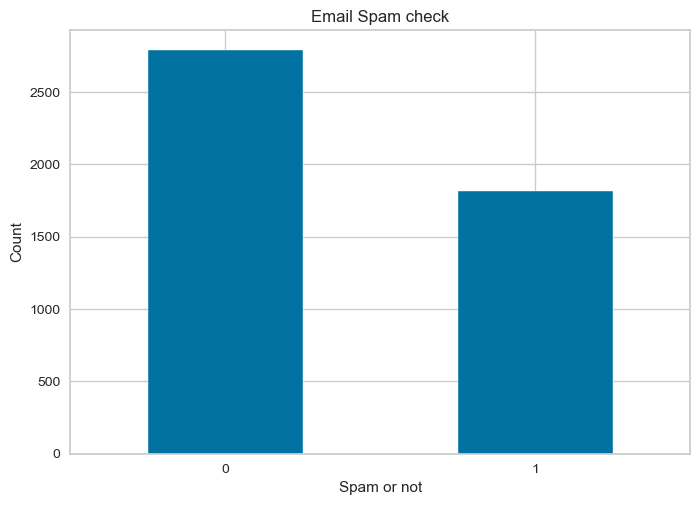

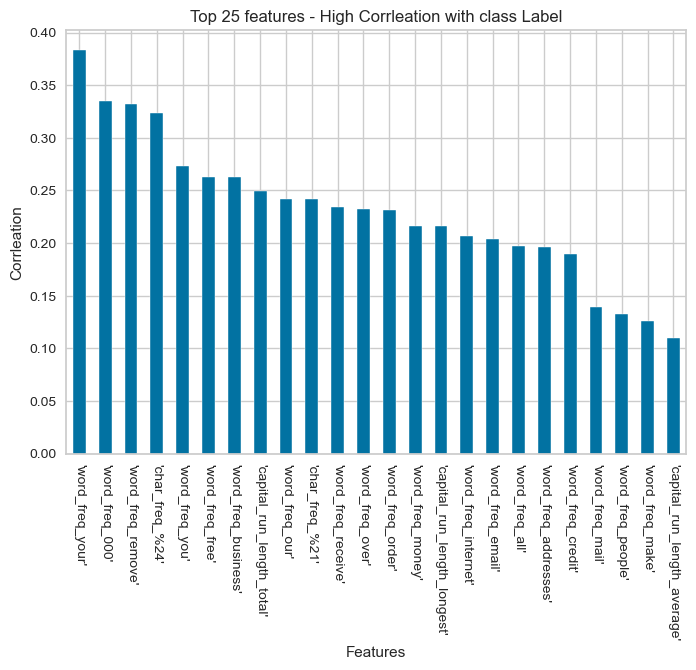

In [3]:
plt.figure()
email_target.value_counts().plot(kind="bar", title="Email Spam check")
plt.xticks(rotation = 0)
plt.xlabel("Spam or not")
plt.ylabel("Count")

plt.figure()
corr=email_data.corr()
plt.title("Top 25 features - High Corrleation with class Label")
corr.sort_values(by=["'class'"],ascending=False).iloc[0].sort_values(ascending=False).head(25)[1:].plot(kind="bar")
plt.xticks(rotation = 270)
plt.xlabel("Features")
plt.ylabel("Corrleation")

In [4]:
def kmeans_report(input, sil):
    train_input_scaled = input
    silhouette_scores = []
    inertia=[]
    for k in range(2,10):
        km = KMeans(n_clusters=k, random_state=42)
        pred_label = km.fit_predict(train_input_scaled)

        # inertia.append(km.inertia_)
        silhouette = silhouette_score(train_input_scaled, km.labels_)
        silhouette_scores.append(silhouette)
        if k==sil:
            sil_visualizer = SilhouetteVisualizer(km)
            sil_visualizer.fit(train_input_scaled)
            sil_visualizer.show()

    plt.figure()
    plt.xticks(range(2,10))
    plt.plot(range(2,10), silhouette_scores)
    plt.title("Silhouette score")
    plt.xlabel("K")
    plt.ylabel("score")
    plt.figure()
    # plt.xticks(range(2,10))
    # plt.plot(range(2,10), inertia)
    # plt.show()
    km = KMeans(random_state=42)
    visualizer = KElbowVisualizer(km, k=(2,10))
    visualizer.fit(input)
    visualizer.poof()

def em_report(input):
    train_input_scaled = input
    bic = []
    aic = []
    silhouette_scores=[]
    for k in range(2,10):
        gmm = GaussianMixture(n_components=k, n_init=10)
        pred_label = gmm.fit_predict(train_input_scaled)
        bic.append(gmm.bic(train_input_scaled))
        aic.append(gmm.aic(train_input_scaled))
    # plt.figure()
    # plt.xticks(range(2,10))
    # plt.plot(range(2,10), silhouette_scores)
    plt.figure()
    plt.xticks(range(2,10))
    plt.title("BIC&AIC score")
    plt.xlabel("K")
    plt.ylabel("score")
    plt.plot(range(2,10), bic, label="BIC")
    plt.plot(range(2,10), aic, label="AIC")
    plt.show()

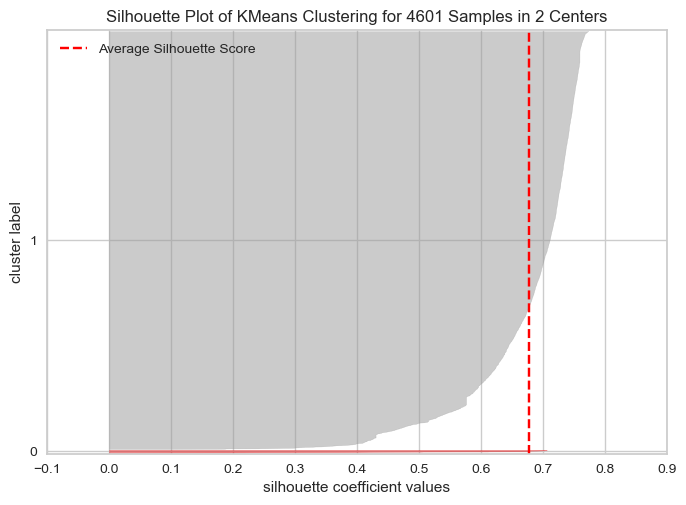

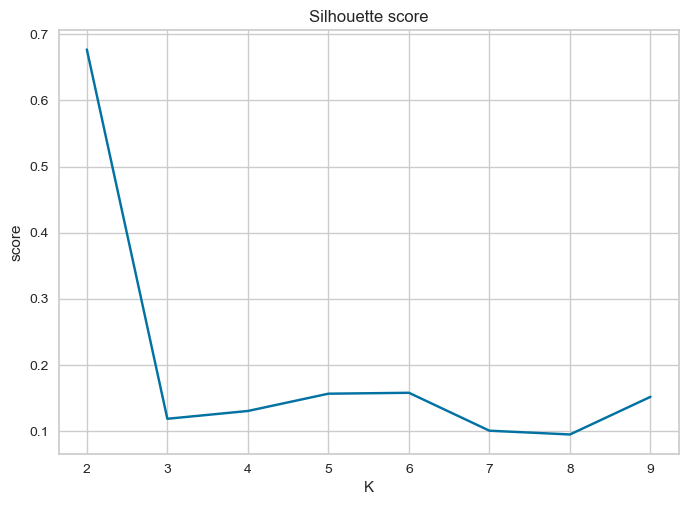

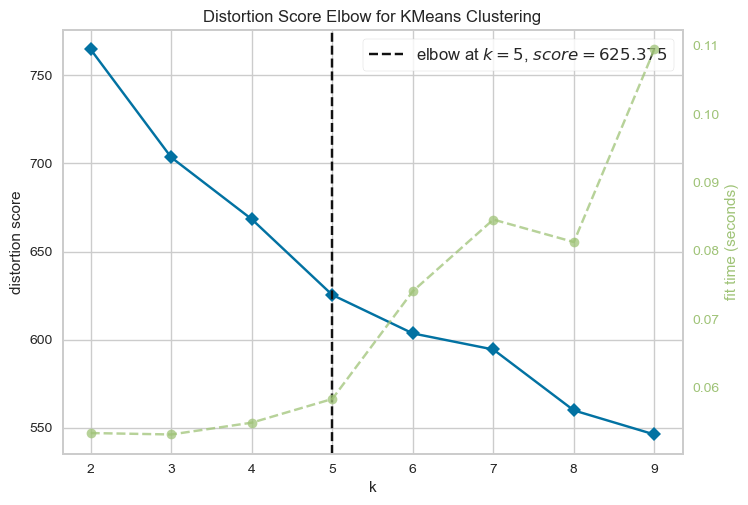

In [5]:
kmeans_report(email_scaled_input,2)

In [6]:
email_km = KMeans(n_clusters=5, random_state=42)
email_kpred_label = email_km.fit_predict(email_scaled_input)
rand_score(email_kpred_label, email_target)

0.6480282169282671

In [7]:
email_km = KMeans(n_clusters=2, random_state=42)
email_kpred_label = email_km.fit_predict(email_scaled_input)
rand_score(email_kpred_label, email_target)

0.5194116590911239

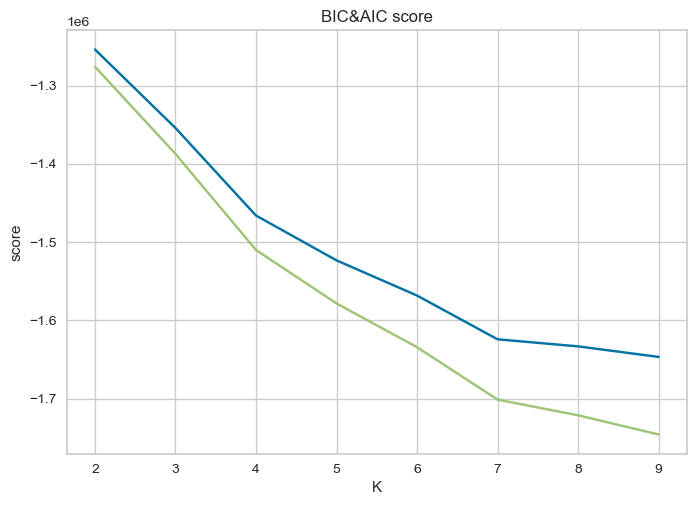

In [8]:
em_report(email_scaled_input)

In [9]:
email_gmm = GaussianMixture(n_components=4, n_init=10)
email_gpred_label = email_gmm.fit_predict(email_scaled_input)
rand_score(email_gpred_label, email_target)

0.565443901609291

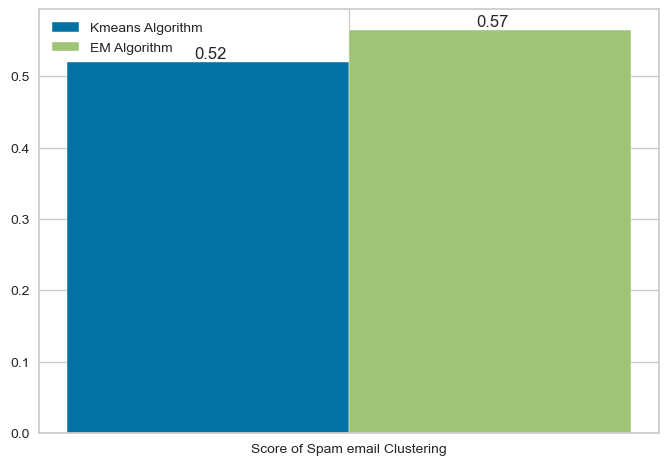

In [10]:
ind = np.arange(1)
width = 2
plt.figure()
plt.bar(ind, (rand_score(email_kpred_label,email_target)), width, label='Kmeans Algorithm')
plt.bar(ind + width, (rand_score(email_gpred_label,email_target)), width, label='EM Algorithm')
for i, v in enumerate([rand_score(email_kpred_label,email_target)]):
    plt.text(i-0.1, v+0.005 ,str(round(v,2)))
for i, v in enumerate([rand_score(email_gpred_label,email_target)]):
    plt.text(i+width-0.1, v+0.005 ,str(round(v,2)))
plt.xticks(ind + width/2,["Score of Spam email Clustering"])
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'Corrleation')

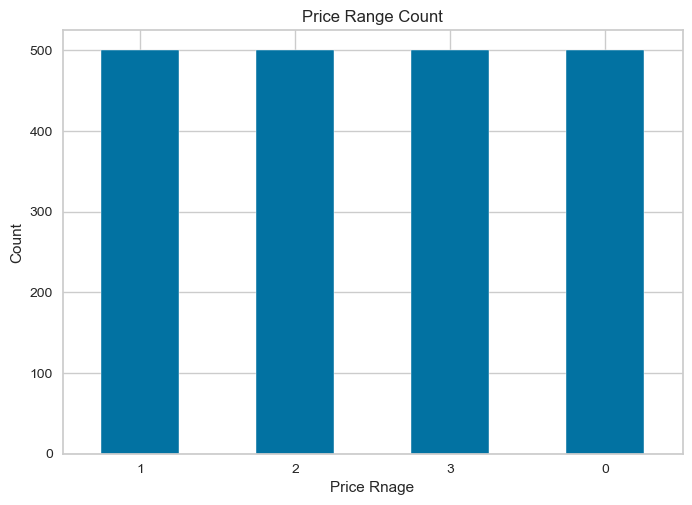

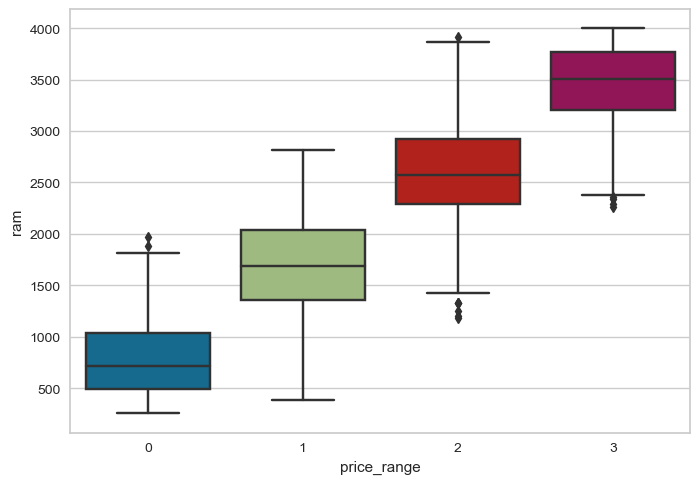

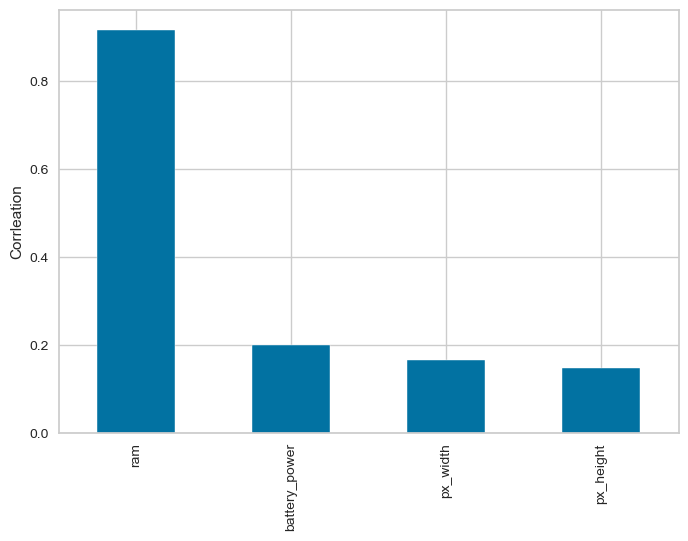

In [11]:
plt.figure()
mobile_target.value_counts().plot(kind="bar", title="Price Range Count")
plt.xticks(rotation = 0)
plt.xlabel("Price Rnage")
plt.ylabel("Count")

plt.figure()
sns.boxplot(y="ram", x="price_range", data=mobile_data)

plt.figure()
corr=mobile_data.corr()
corr.sort_values(by=['price_range'],ascending=False).iloc[0].sort_values(ascending=False).head(5)[1:].plot(kind="bar")
plt.ylabel("Corrleation")

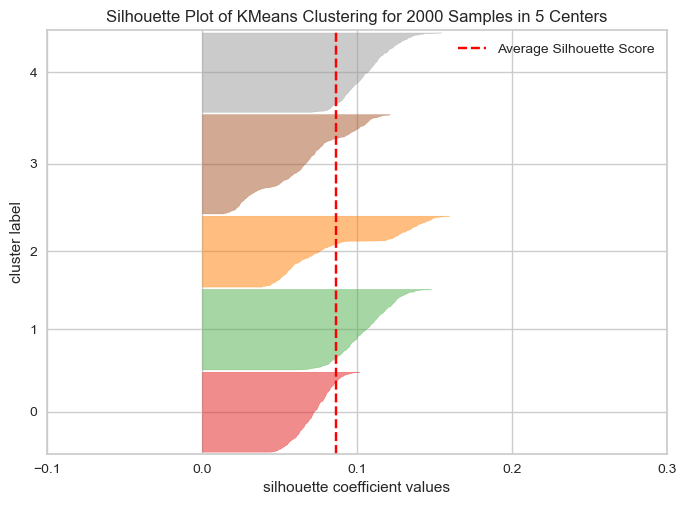

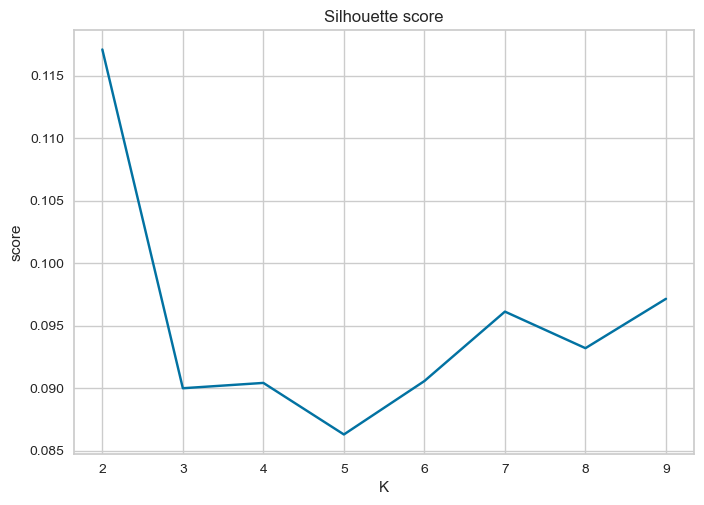

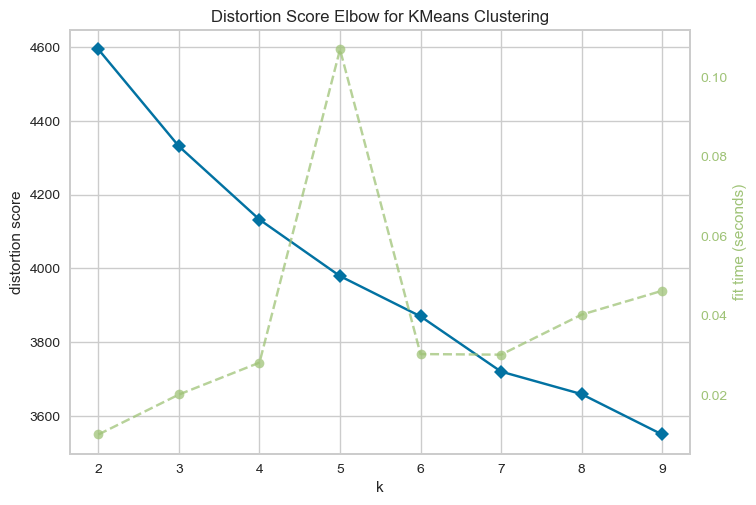

In [12]:
kmeans_report(mobile_scaled_input,5)

In [13]:
mobile_km = KMeans(n_clusters=5, random_state=42)
mobile_kpred_label = mobile_km.fit_predict(mobile_scaled_input)
rand_score(mobile_kpred_label, mobile_target)

0.6489869934967484

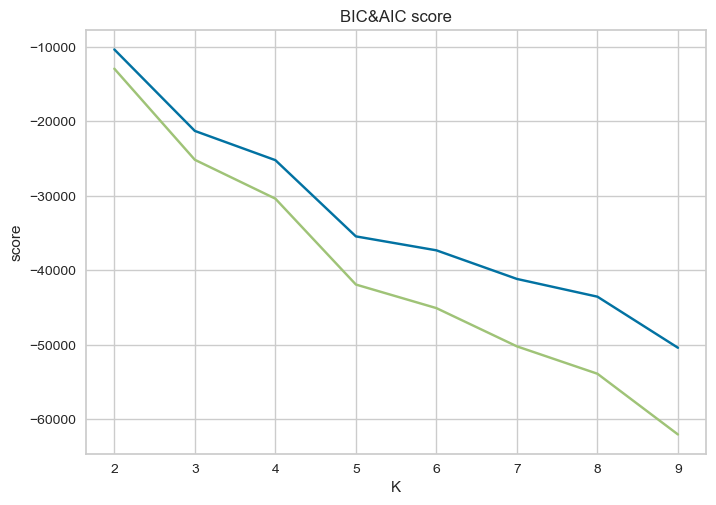

In [14]:
em_report(mobile_scaled_input)

In [15]:
mobile_gmm = GaussianMixture(n_components=4, n_init=10)
mobile_gpred_label = mobile_gmm.fit_predict(mobile_scaled_input)
rand_score(mobile_gpred_label, mobile_target)

0.6139259629814907

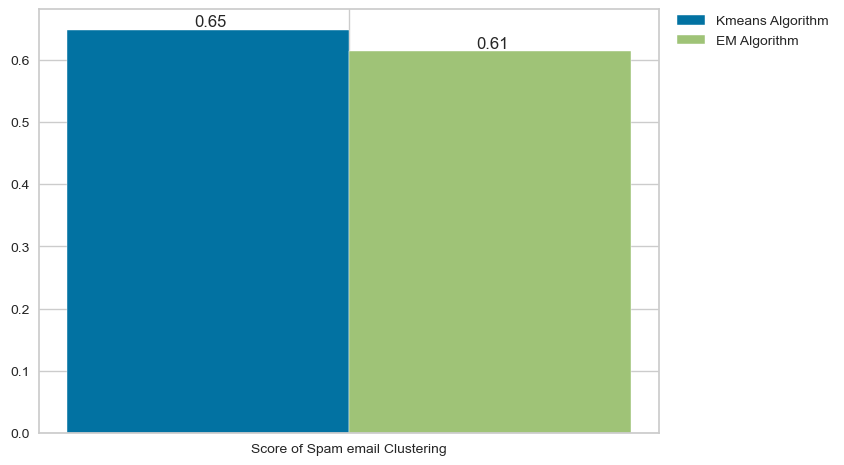

In [16]:
ind = np.arange(1)
width = 2
plt.figure()
plt.bar(ind, (rand_score(mobile_kpred_label,mobile_target)), width, label='Kmeans Algorithm')
plt.bar(ind + width, (rand_score(mobile_gpred_label,mobile_target)), width, label='EM Algorithm')
for i, v in enumerate([rand_score(mobile_kpred_label,mobile_target)]):
    plt.text(i-0.1, v+0.005 ,str(round(v,2)))
for i, v in enumerate([rand_score(mobile_gpred_label,mobile_target)]):
    plt.text(i+width-0.1, v+0.005 ,str(round(v,2)))
plt.xticks(ind + width/2,["Score of Spam email Clustering"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()